In [1]:
# Importing Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [69]:
# Import Data

In [70]:
bank_data=pd.read_csv('bank-full.csv',sep=(';'))
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [71]:
# Data Understanding

In [72]:
bank_data.shape

(45211, 17)

In [73]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [74]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [75]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [76]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [11]:
# Data Visualization

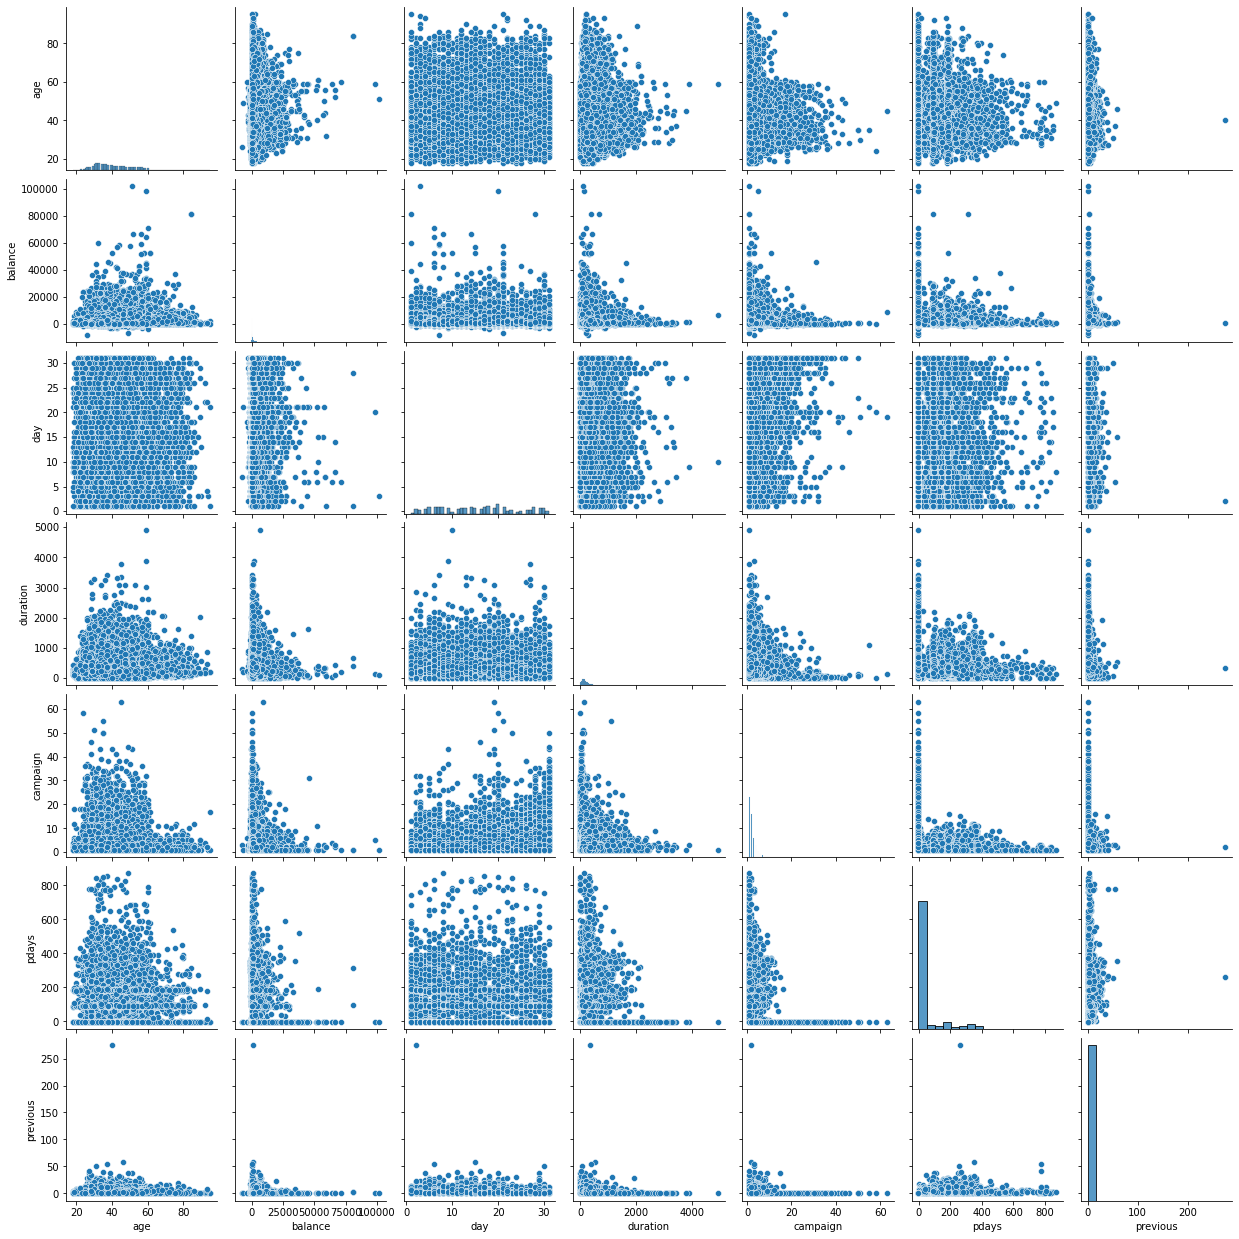

In [12]:
sns.pairplot(bank_data)

In [13]:
# Data Preprocessing

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
bank_data['job']=le.fit_transform(bank_data.job)
bank_data['marital']=le.fit_transform(bank_data.marital)
bank_data['education']=le.fit_transform(bank_data.education)
bank_data['default']=le.fit_transform(bank_data.default)
bank_data['housing']=le.fit_transform(bank_data.housing)
bank_data['loan']=le.fit_transform(bank_data.loan)
bank_data['y']=le.fit_transform(bank_data.y)
bank_data['month']=le.fit_transform(bank_data.month)
bank_data['contact']=le.fit_transform(bank_data.contact)
bank_data['poutcome']=le.fit_transform(bank_data.poutcome)

In [79]:
#bank_data.head()

In [80]:
# Model Building

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x=bank_data.drop(columns=['y'],axis=1)
y=bank_data.y

In [83]:
x.shape,y.shape

((45211, 16), (45211,))

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)

In [85]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((36168, 16), (36168,), (9043, 16), (9043,))

In [23]:
# Model Training

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr_model=LogisticRegression()

In [89]:
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Model Testing

In [90]:
y_pred=lr_model.predict(x_test)

In [91]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test,y_pred)
accuracy_score = accuracy_score(y_test,y_pred)
print (confusion_matrix)
print (accuracy_score)

[[7879  148]
 [ 815  201]]
0.8935087913303107


In [37]:
# For Overfitting problem we perform some Regularization Technique On our DataSet
 

 # Ridge Regression(L2) --> When my all input features are important

In [36]:
from sklearn.linear_model import Ridge

In [40]:
ridgeR=Ridge()

In [41]:
ridgeR.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
ridge_pred=ridgeR.predict(x_test)

In [46]:
ridge_coefficient=pd.DataFrame()
ridge_coefficient['Columns']=x_train.columns
ridge_coefficient['Coefficient Value']=pd.Series(ridgeR.coef_)
print(ridge_coefficient)

      Columns  Coefficient Value
0         age           0.000745
1         job           0.001090
2     marital           0.018798
3   education           0.016733
4     default          -0.024690
5     balance           0.000002
6     housing          -0.086204
7        loan          -0.044628
8     contact          -0.038418
9         day          -0.000317
10      month           0.004757
11   duration           0.000485
12   campaign          -0.003098
13      pdays           0.000433
14   previous           0.007603
15   poutcome           0.027053


In [93]:
# Trying Lasso (L1) --> It eliminates the feature which are not important

In [94]:
from sklearn.linear_model import Lasso

In [95]:
lasso=Lasso()

In [96]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
lasso_pred=lasso.predict(x_test)

In [99]:
lasso_coefficient=pd.DataFrame()
lasso_coefficient['Columns']=x_train.columns
lasso_coefficient['Coefficient Value']=pd.Series(lasso.coef_)
print(lasso_coefficient)

      Columns  Coefficient Value
0         age           0.000000
1         job           0.000000
2     marital           0.000000
3   education           0.000000
4     default          -0.000000
5     balance           0.000005
6     housing          -0.000000
7        loan          -0.000000
8     contact          -0.000000
9         day          -0.000000
10      month          -0.000000
11   duration           0.000478
12   campaign          -0.000000
13      pdays           0.000233
14   previous           0.000000
15   poutcome          -0.000000
